**Questão - Identificar o OUTPUT Grade
do estudante.**





# Lendo a base de dados






In [1]:
import pandas as pd

dados = pd.read_csv('student_prediction.csv')

dados.head()

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1


# 1. A. Pré-processamento dos dados

In [2]:
dados.columns

Index(['STUDENTID', 'AGE', 'GENDER', 'HS_TYPE', 'SCHOLARSHIP', 'WORK',
       'ACTIVITY', 'PARTNER', 'SALARY', 'TRANSPORT', 'LIVING', 'MOTHER_EDU',
       'FATHER_EDU', '#_SIBLINGS', 'KIDS', 'MOTHER_JOB', 'FATHER_JOB',
       'STUDY_HRS', 'READ_FREQ', 'READ_FREQ_SCI', 'ATTEND_DEPT', 'IMPACT',
       'ATTEND', 'PREP_STUDY', 'PREP_EXAM', 'NOTES', 'LISTENS',
       'LIKES_DISCUSS', 'CLASSROOM', 'CUML_GPA', 'EXP_GPA', 'COURSE ID',
       'GRADE'],
      dtype='object')

* Traduzir os nomes das colunas para português, isso ajuda na compreensão das variaveis envolvidas. 

In [3]:
colunas = {
            'STUDENTID':'ID_aluno','AGE':'idade', 'GENDER':'sexo', 
           'HS_TYPE' : 'Formacao_ensino_medio', 'SCHOLARSHIP':'tipo_bolsa', 
           'WORK' : 'trabalho_adicional','ACTIVITY' : 'atividades_diversas', 
           'PARTNER' : 'tem_companheiro', 'SALARY' : 'salario_total',
           'TRANSPORT' : 'transporte_universidade', 'LIVING' : 'tipo_moradia', 
           'MOTHER_EDU' : 'escolaridade_mae', 'FATHER_EDU' : 'escolaridade_pai',
           '#_SIBLINGS': 'numero_irmaos', 'KIDS':'status_parental', 
           'MOTHER_JOB':'ocupacao_mae', 'FATHER_JOB':'ocupacao_pai',
           'STUDY_HRS' : 'horas_semanais_estudo', 'READ_FREQ' : 'freq_leitura', 
           'READ_FREQ_SCI' : 'freq_leitura_cientifica', 'ATTEND_DEPT':'presenca_seminarios',
           'IMPACT' : 'impacto_sucesso', 'ATTEND' : 'freq_aulas', 
           'PREP_STUDY' : 'prep_exames_1', 'PREP_EXAM' : 'prep_exames_2', 
           'NOTES' : 'faz_anotacoes', 'LISTENS':'ouve_aulas',
           'LIKES_DISCUSS' : 'gosta_de_discussoes', 'CLASSROOM' : 'flip_classroom', 
           'CUML_GPA':'media_notas_acumuladas_ult_semestre', 'EXP_GPA' : 'media_notas_acumuladas_esp_graduacao', 
           'COURSE ID' : 'ID_curso', 'GRADE':'nota_de_saida' }
dados.rename(columns = colunas, inplace=True)

* Verificando a existência de dados nulos

In [4]:
dados.isnull().sum()

ID_aluno                                0
idade                                   0
sexo                                    0
Formacao_ensino_medio                   0
tipo_bolsa                              0
trabalho_adicional                      0
atividades_diversas                     0
tem_companheiro                         0
salario_total                           0
transporte_universidade                 0
tipo_moradia                            0
escolaridade_mae                        0
escolaridade_pai                        0
numero_irmaos                           0
status_parental                         0
ocupacao_mae                            0
ocupacao_pai                            0
horas_semanais_estudo                   0
freq_leitura                            0
freq_leitura_cientifica                 0
presenca_seminarios                     0
impacto_sucesso                         0
freq_aulas                              0
prep_exames_1                     

* Eliminando variáveis que não contribuem com o objetivo da solução

In [5]:
dados = dados.drop(labels = ['ocupacao_mae','ocupacao_pai', 'numero_irmaos', 'escolaridade_mae', 'escolaridade_pai'], axis = 1)

In [6]:
dados.columns

Index(['ID_aluno', 'idade', 'sexo', 'Formacao_ensino_medio', 'tipo_bolsa',
       'trabalho_adicional', 'atividades_diversas', 'tem_companheiro',
       'salario_total', 'transporte_universidade', 'tipo_moradia',
       'status_parental', 'horas_semanais_estudo', 'freq_leitura',
       'freq_leitura_cientifica', 'presenca_seminarios', 'impacto_sucesso',
       'freq_aulas', 'prep_exames_1', 'prep_exames_2', 'faz_anotacoes',
       'ouve_aulas', 'gosta_de_discussoes', 'flip_classroom',
       'media_notas_acumuladas_ult_semestre',
       'media_notas_acumuladas_esp_graduacao', 'ID_curso', 'nota_de_saida'],
      dtype='object')

* Aplicando redimensionamento de atributos


In [7]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X = dados[['idade', 'sexo', 'Formacao_ensino_medio', 'tipo_bolsa',
       'trabalho_adicional', 'atividades_diversas', 'tem_companheiro',
       'salario_total', 'transporte_universidade', 'tipo_moradia',
       'status_parental', 'horas_semanais_estudo', 'freq_leitura',
       'freq_leitura_cientifica', 'presenca_seminarios', 'impacto_sucesso',
       'freq_aulas', 'prep_exames_1', 'prep_exames_2', 'faz_anotacoes',
       'ouve_aulas', 'gosta_de_discussoes', 'flip_classroom',
       'media_notas_acumuladas_ult_semestre',
       'media_notas_acumuladas_esp_graduacao', 'ID_curso']]
Y = dados['nota_de_saida']

SEED = 158020
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(X, Y, test_size = 0.20,
                                                         stratify = Y)
modelo = DecisionTreeClassifier(max_depth=4)
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)

print("Treinaremos com %d elementos e testaremos com %d elementos" % (len(treino_x), len(teste_x)))
acuracia = accuracy_score(teste_y, previsoes) * 100
print("A acurácia foi %.2f%%" % acuracia)


Treinaremos com 116 elementos e testaremos com 29 elementos
A acurácia foi 37.93%


# Análise 

O objetivo aqui é aplicar o train_test_split para um melhor redimensionamento dos dados, o resultado é 108 estudantes para o treino e 37 para teste. Aproveitamos para aplicar o Decision Tree Classifier para avaliar a acurácia, pelo score é possível perceber que o indice não é satisfatório, devido ser inferior a 50%. No entanto, a aplicação contribui para o desenvolvimento do conhecimento nas técnicas e na analise. 

In [8]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
SEED = 301
np.random.seed(SEED)

cv = KFold(n_splits = 10)

results = cross_validate(modelo, X, Y, cv = cv, return_train_score=False)
media = results['test_score'].mean()
desvio_padrao = results['test_score'].std()
print("Accuracy com cross validation, 10 = [%.2f, %.2f]" % ((media - 2 * desvio_padrao)*100, (media + 2 * desvio_padrao) * 100))

Accuracy com cross validation, 10 = [1.97, 57.27]


# Análise 
Aqui o objetivo principal é utilizar a validação cruzada através do cross_validate e do K-Fold, que segundo as instruções usaremos 10 para o n_splits. O modelo aplicado segue o do tópico anterior (DEcision Tree Classifier), no entanto, com a aplicação do 10-Fold e do cross_validate. Para avaliar a técnica, foi coletado o test_score, calculado a media e o desvio padrão sobre ele, para que assim podemos calcular o intervalo de acurácia, que segundo o cross validation é de [1.97, 57,27]. O resultado é mais satisfatório que anterior, no entanto, não é tão promissor. Continua sendo valido a aplicação afim de conhecimento e prática na técnica. 

* 1. B. Análise exploratória dos dados de saída


# Mostrando o desbalanceamento

In [9]:

print(pd.__version__)

!pip install pandas --upgrade

1.4.2


Class 0: 8
Class 1: 35
Class 2: 24
Class 3: 21
Class 4: 10
Class 5: 17
Class 6: 13
Class 7: 17


<AxesSubplot:title={'center':'Count (target)'}>

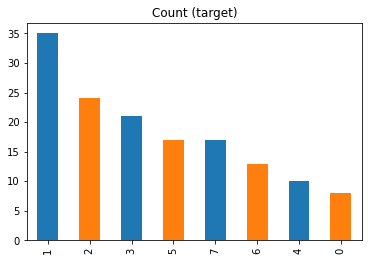

In [10]:
target_count = dados.nota_de_saida.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Class 2:', target_count[2])
print('Class 3:', target_count[3])
print('Class 4:', target_count[4])
print('Class 5:', target_count[5])
print('Class 6:', target_count[6])
print('Class 7:', target_count[7])
target_count.plot(kind='bar', title='Count (target)',color = ['#1F77B4', '#FF7F0E'])

C:\Users\laris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


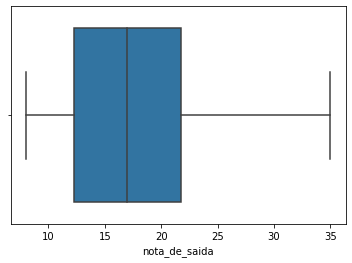

In [11]:
import seaborn as sns
ax = sns.boxplot(target_count)

Class 0: 8
Class 1: 35
Proportion: 0.23 : 1


<AxesSubplot:title={'center':'Count (target)'}>

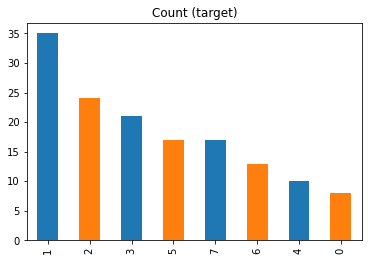

In [12]:
# Classe Maioria = 1
# Classe menoria = 0

#IDENTIFICAR DESBALANCEAMENTO DOS DADOS
target_count = dados.nota_de_saida.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='bar', title='Count (target)',color = ['#1F77B4', '#FF7F0E'])

Random under-sampling:
0    35
1    35
Name: nota_de_saida, dtype: int64


<AxesSubplot:title={'center':'Count (nota_de_saida)'}>

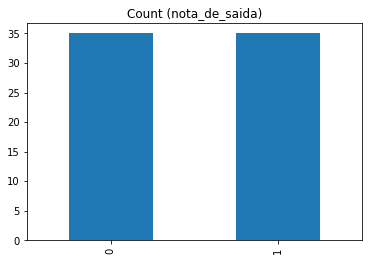

In [13]:
#CONTAR AS CLASSIFICACOES
# Classe menoria = 0
count_class_0 = target_count[0]
# Classe Maioria = 1
count_class_1 = target_count[1]

#DIVIDE O DATA FRAME POR CLASSIFICACAO
df_class_0 = dados[dados['nota_de_saida'] == 0]
df_class_1 = dados[dados['nota_de_saida'] == 1]

#EQUALIZANDO A BASE POR UNDER SAMPLING
df_class_0_under = df_class_0.sample(count_class_1, replace=True)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_test_under.nota_de_saida.value_counts())

df_test_under.nota_de_saida.value_counts().plot(kind='bar', title='Count (nota_de_saida)')



Random over-sampling:
0    35
1    24
2    21
4    17
6    17
7    17
5    13
3    10
Name: nota_de_saida, dtype: int64


<AxesSubplot:title={'center':'Count (nota_de_saida)'}>

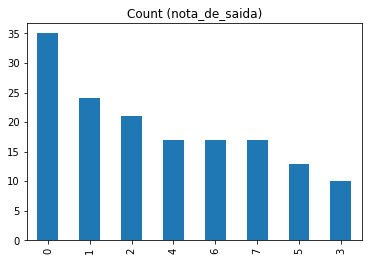

In [14]:
#CONTAR AS CLASSIFICACOES
# Classe menoria = 0
count_class_0 = target_count[0]
# Classe Maioria = 1
count_class_1 = target_count[1]
count_class_2 = target_count[2]
count_class_3 = target_count[3]
count_class_4 = target_count[4]
count_class_5 = target_count[5]
count_class_6 = target_count[6]
count_class_7 = target_count[7]

#DIVIDE O DATA FRAME POR CLASSIFICACAO
df_class_0 = dados[dados['nota_de_saida'] == 0]
df_class_1 = dados[dados['nota_de_saida'] == 1]
df_class_2 = dados[dados['nota_de_saida'] == 2]
df_class_3 = dados[dados['nota_de_saida'] == 3]
df_class_4 = dados[dados['nota_de_saida'] == 4]
df_class_5 = dados[dados['nota_de_saida'] == 5]
df_class_6 = dados[dados['nota_de_saida'] == 6]
df_class_7 = dados[dados['nota_de_saida'] == 7]


#EQUALIZANDO A BASE POR UNDER SAMPLING
df_class_0_over = df_class_0.sample(count_class_1, replace=True)
df_test_over1 = pd.concat([df_class_0_over, df_class_1], axis=0)
df_test_over1 = df_class_1.sample(count_class_2, replace=True)
df_test_over2 = df_class_2.sample(count_class_3, replace=True)
df_test_over3 = df_class_3.sample(count_class_4, replace=True)
df_test_over4 = df_class_4.sample(count_class_5, replace=True)
df_test_over5 = df_class_5.sample(count_class_6, replace=True)
df_test_over6 = df_class_6.sample(count_class_7, replace=True)
df_test_over7 = pd.concat([df_class_0_over, df_test_over1, df_test_over2, df_test_over3,df_test_over4, df_test_over5, df_test_over6, df_class_7], axis=0)


print('Random over-sampling:')
print(df_test_over7.nota_de_saida.value_counts())

df_test_over7.nota_de_saida.value_counts().plot(kind='bar', title='Count (nota_de_saida)')

C:\Users\laris\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


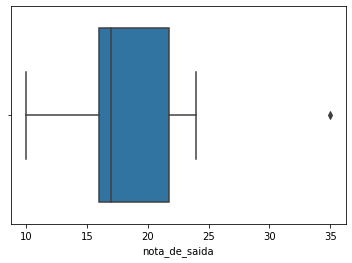

In [15]:
ax = sns.boxplot(df_test_over7.nota_de_saida.value_counts())

# Análise

Através da aplicação do oversampling não conseguimos alcançar o mesmo tamanho para as classes. No entanto, houve uma melhora na distribuição, conforme podemos verificar pelo gráfico boxplot do antes e depois da aplicação da técnica. A amplitude entre as classes diminui, proporcionando uma maior taxa de equalização do tamanho das classes.

# Utiizando a biblioteca AUTOML para fazer previsão

In [16]:
X = dados[['idade', 'sexo', 'Formacao_ensino_medio', 'tipo_bolsa',
       'trabalho_adicional', 'atividades_diversas', 'tem_companheiro',
       'salario_total', 'transporte_universidade', 'tipo_moradia',
       'status_parental', 'horas_semanais_estudo', 'freq_leitura',
       'freq_leitura_cientifica', 'presenca_seminarios', 'impacto_sucesso',
       'freq_aulas', 'prep_exames_1', 'prep_exames_2', 'faz_anotacoes',
       'ouve_aulas', 'gosta_de_discussoes', 'flip_classroom',
       'media_notas_acumuladas_ult_semestre',
       'media_notas_acumuladas_esp_graduacao', 'ID_curso']]
Y = dados['nota_de_saida']

SEED = 158020
np.random.seed(SEED)
treino_x, teste_x, treino_y, teste_y = train_test_split(X, Y, test_size = 0.20,
                                                         stratify = Y)


TÉCNICA DE AUTOML - ÁRVORE DE DECISÃO

Hiperparâmetro - Max_depth
* variações a serem utilizadas
max_depth = 4
max_depth = 10
max_depth = 40

In [17]:
modelo = DecisionTreeClassifier(max_depth=4)
modelo.fit(treino_x, treino_y)
previsoes_4 = modelo.predict(teste_x)

In [18]:
previsoes_4

array([1, 6, 1, 6, 3, 1, 7, 1, 6, 1, 1, 0, 1, 7, 7, 1, 2, 0, 1, 5, 1, 1,
       6, 1, 1, 3, 1, 6, 5], dtype=int64)

In [19]:
modelo = DecisionTreeClassifier(max_depth=10)
modelo.fit(treino_x, treino_y)
previsoes_10 = modelo.predict(teste_x)

In [20]:
teste_y.shape

(29,)

In [21]:
previsoes_10

array([5, 6, 1, 6, 5, 1, 7, 1, 5, 2, 2, 0, 1, 6, 5, 1, 2, 7, 1, 0, 1, 1,
       7, 3, 2, 5, 0, 6, 5], dtype=int64)

In [22]:
modelo = DecisionTreeClassifier(max_depth=40)
modelo.fit(treino_x, treino_y)
previsoes_40 = modelo.predict(teste_x)

In [23]:
previsoes_40

array([2, 4, 1, 5, 5, 1, 7, 1, 4, 2, 2, 0, 1, 7, 7, 1, 2, 0, 1, 0, 1, 1,
       7, 7, 2, 5, 7, 6, 5], dtype=int64)

* Aplicação da Matriz de Confusão

In [24]:
# matriz de confusão em sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score #acuracia

# valores reais
real = teste_y
# valores previstos
previsto = previsoes_4

#matriz de confusão
print(pd.crosstab(real,previsto, rownames=['Real'], colnames=['Previsto'], margins=True))

# Acurácia

acuracia = accuracy_score(real, previsto)
print('Acurácia: %f' % acuracia)



Previsto  0   1  2  3  5  6  7  All
Real                               
0         1   1  0  0  0  0  0    2
1         0   5  0  0  2  0  0    7
2         0   4  1  0  0  0  0    5
3         1   0  0  2  0  0  1    4
4         0   1  0  0  0  1  0    2
5         0   2  0  0  0  1  0    3
6         0   1  0  0  0  1  1    3
7         0   0  0  0  0  2  1    3
All       2  14  1  2  2  5  3   29
Acurácia: 0.379310


In [25]:
# valores reais
real = teste_y
# valores previstos
previsto = previsoes_10

#matriz de confusão
print(pd.crosstab(real,previsto, rownames=['Real'], colnames=['Previsto'], margins=True))

# Acurácia

acuracia = accuracy_score(real, previsto)
print('Acurácia: %f' % acuracia)


Previsto  0  1  2  3  5  6  7  All
Real                              
0         1  0  1  0  0  0  0    2
1         2  3  1  0  1  0  0    7
2         0  2  2  0  1  0  0    5
3         0  0  0  0  2  1  1    4
4         0  1  0  0  0  0  1    2
5         0  2  0  0  1  0  0    3
6         0  0  0  1  1  1  0    3
7         0  0  0  0  0  2  1    3
All       3  8  4  1  6  4  3   29
Acurácia: 0.310345


In [26]:
# valores reais
real = teste_y
# valores previstos
previsto = previsoes_40

#matriz de confusão
print(pd.crosstab(real,previsto, rownames=['Real'], colnames=['Previsto'], margins=True))

# Acurácia

acuracia = accuracy_score(real, previsto)
print('Acurácia: %f' % acuracia)

Previsto  0  1  2  4  5  6  7  All
Real                              
0         1  0  1  0  0  0  0    2
1         1  3  1  0  1  0  1    7
2         0  2  3  0  0  0  0    5
3         1  0  0  0  2  0  1    4
4         0  1  0  0  0  0  1    2
5         0  2  0  1  0  0  0    3
6         0  0  0  1  0  0  2    3
7         0  0  0  0  1  1  1    3
All       3  8  5  2  4  1  6   29
Acurácia: 0.275862


# Análise

É um tabela que mostra as frequências de classificação para cada classe do modelo, mostra as frequências:

Verdadeiro positivo (true positive — TP): ocorre quando no conjunto real, a classe que estamos buscando foi prevista corretamente. 
Falso positivo (false positive — FP): ocorre quando no conjunto real, a classe que estamos buscando prever foi prevista incorretamente. 
Falso verdadeiro (true negative — TN): ocorre quando no conjunto real, a classe que não estamos buscando prever foi prevista corretamente.
Falso negativo (false negative — FN): ocorre quando no conjunto real, a classe que não estamos buscando prever foi prevista incorretamente. 

A métrica selecionada para auxilio na compreensão dos resultados da matriz de confusão é a acurácia, pois nos diz quanto o modelo acertou das previsões possiveis. Conforme calculado, não tivemos scores de acurácia superiores a 50%, o que representa resultados insatisfatórios. 

* 2. Utilize a mesma base de dados (lembrem de tirar o rótulo, obviamente) da questão anterior de forma que:

In [27]:
dados = dados.drop(labels = ['ID_aluno'], axis = 1)



In [28]:
dados['ID_aluno'] = range(1,146)
dados

,idade,sexo,Formacao_ensino_medio,tipo_bolsa,trabalho_adicional,atividades_diversas,tem_companheiro,salario_total,transporte_universidade,tipo_moradia,...,prep_exames_2,faz_anotacoes,ouve_aulas,gosta_de_discussoes,flip_classroom,media_notas_acumuladas_ult_semestre,media_notas_acumuladas_esp_graduacao,ID_curso,nota_de_saida,ID_aluno
0,2,2,3,3,1,2,2,1,1,1,...,1,3,2,1,2,1,1,1,1,1
1,2,2,3,3,1,2,2,1,1,1,...,1,3,2,3,2,2,3,1,1,2
2,2,2,2,3,2,2,2,2,4,2,...,1,2,2,1,1,2,2,1,1,3
3,1,1,1,3,1,2,1,2,1,2,...,2,3,2,2,1,3,2,1,1,4
4,2,2,1,3,2,2,1,3,1,4,...,1,2,2,2,1,2,2,1,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2,1,2,3,1,1,2,1,1,2,...,1,2,1,2,1,3,3,9,5,141
141,1,1,2,4,2,2,2,1,4,2,...,1,3,2,2,1,5,3,9,5,142
142,1,1,1,4,2,2,2,1,1,1,...,1,3,3,2,1,4,3,9,1,143
143,2,1,2,4,1,1,1,5,2,3,...,1,2,1,2,1,5,3,9,4,144


* Utilizando Kmeans

In [29]:
from sklearn.cluster import KMeans
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
np_dataset = min_max_scaler.fit_transform(dados)
np_dataset



array([[0.5       , 1.        , 1.        , ..., 0.        , 0.14285714,
        0.        ],
       [0.5       , 1.        , 1.        , ..., 0.        , 0.14285714,
        0.00694444],
       [0.5       , 1.        , 0.5       , ..., 0.        , 0.14285714,
        0.01388889],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.14285714,
        0.98611111],
       [0.5       , 0.        , 0.5       , ..., 1.        , 0.57142857,
        0.99305556],
       [0.        , 0.        , 0.        , ..., 1.        , 0.42857143,
        1.        ]])

In [30]:

agrupador = KMeans(n_clusters=3)
agrupador.fit(np_dataset)
labels = agrupador.labels_
print(labels)

[2 2 2 1 1 2 2 1 1 1 2 0 2 2 2 2 2 2 2 1 1 1 1 2 2 1 1 2 1 2 1 2 2 1 1 2 1
 1 2 1 2 2 2 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 1 1 2 2 2 1 2 1 1 2 2 1 1 2 1 2
 2 2 2 1 0 2 1 2 1 2 1 2 2 2 1 2 1 1 2 1 1 1 1 2 2 2 2 1 1 1 0 2 2 0 0 1 2
 0 0 0 0 0 0 0 1 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


* Utilizando Hierarquico

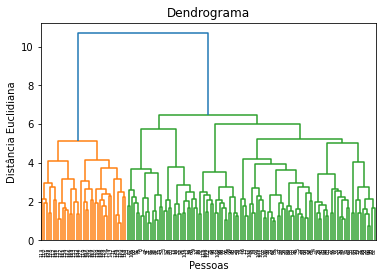

In [31]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering



dendrograma = dendrogram(linkage(np_dataset, method = 'ward'))
plt.title('Dendrograma')
plt.xlabel('Pessoas')
plt.ylabel('Distância Euclidiana')

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
previsoes = hc.fit_predict(np_dataset)

In [32]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
previsoes = hc.fit_predict(np_dataset)
previsoes

array([2, 2, 0, 2, 0, 0, 0, 1, 0, 2, 2, 1, 2, 2, 2, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

* Teste o K igual à 5 e 7 - ***KMEANS***

In [33]:
# K = 5
agrupador = KMeans(n_clusters=3)
agrupador.fit(np_dataset)
labels = agrupador.labels_
print('K-means para 5 clusters')
print(labels)
print('\n')

# K = 7
agrupador = KMeans(n_clusters=3)
agrupador.fit(np_dataset)
labels = agrupador.labels_
print('K-means para 7 clusters')
print(labels)
print('\n')

K-means para 5 clusters
[2 2 2 1 1 2 2 1 1 1 2 0 2 2 2 2 2 2 2 1 1 1 1 2 2 1 1 2 1 2 1 2 2 1 1 2 1
 1 2 1 2 2 2 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 1 1 2 2 2 1 2 1 1 2 2 1 1 2 1 2
 2 2 2 1 0 2 1 2 1 2 1 2 2 2 1 2 1 1 2 1 1 1 1 2 2 2 2 1 1 1 0 2 2 0 0 1 2
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


K-means para 7 clusters
[2 2 2 0 0 2 2 1 0 0 2 1 2 2 2 2 2 2 2 0 0 0 0 2 2 0 0 2 0 2 0 2 2 0 0 2 0
 0 2 0 2 2 2 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 0 0 2 2 2 0 2 0 0 2 2 0 0 2 0 2
 2 2 2 0 1 2 0 2 0 2 0 2 2 2 0 2 0 0 2 0 0 0 0 2 2 2 2 0 0 0 2 2 2 1 1 0 2
 1 1 1 1 1 1 1 0 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]




* Na execução do Hierárquico, varie 2 métodos do linkage; OBS.: utilize os
mesmos valores de clusters escolhidos na questão anterior.

array([4, 4, 0, 2, 0, 0, 0, 1, 3, 2, 2, 1, 2, 2, 4, 0, 2, 0, 0, 0, 0, 0,
       0, 4, 0, 0, 3, 0, 0, 0, 4, 4, 2, 2, 0, 0, 0, 4, 0, 2, 0, 4, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 4, 2, 2, 0, 0, 0, 4, 0, 3, 2, 0, 0, 0, 0, 0,
       0, 4, 4, 0, 3, 2, 3, 0, 0, 3, 3, 0, 4, 0, 2, 4, 0, 0, 0, 0, 0, 3,
       3, 0, 3, 4, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 2, 4, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

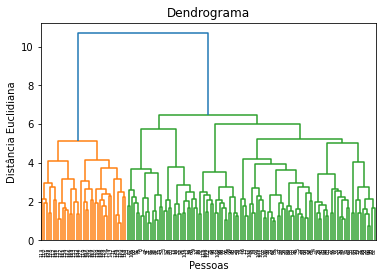

In [34]:
# método: ward n_cluster = 5
dendrograma = dendrogram(linkage(np_dataset, method = 'ward'))
plt.title('Dendrograma')
plt.xlabel('Pessoas')
plt.ylabel('Distância Euclidiana')

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
previsoes = hc.fit_predict(np_dataset)
previsoes



array([4, 4, 2, 5, 0, 2, 2, 1, 3, 5, 5, 1, 5, 5, 4, 2, 5, 2, 2, 0, 0, 0,
       0, 4, 2, 0, 3, 0, 0, 2, 4, 4, 5, 5, 0, 0, 0, 4, 2, 5, 2, 4, 2, 0,
       0, 0, 0, 0, 3, 2, 0, 4, 5, 5, 2, 0, 2, 4, 0, 3, 5, 2, 2, 0, 2, 0,
       0, 4, 4, 0, 3, 5, 3, 2, 2, 3, 3, 0, 4, 2, 5, 4, 0, 2, 0, 2, 2, 3,
       3, 2, 3, 4, 2, 2, 0, 3, 3, 2, 3, 2, 2, 2, 2, 2, 5, 4, 3, 1, 1, 3,
       6, 6, 6, 6, 1, 1, 6, 1, 3, 1, 1, 1, 3, 6, 1, 1, 1, 6, 6, 1, 1, 6,
       6, 6, 6, 6, 1, 6, 1, 1, 1, 6, 6, 1, 6], dtype=int64)

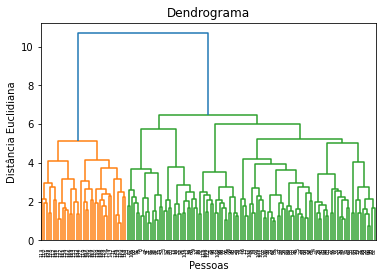

In [35]:
# método: ward n_cluster = 7
dendrograma = dendrogram(linkage(np_dataset, method = 'ward'))
plt.title('Dendrograma')
plt.xlabel('Pessoas')
plt.ylabel('Distância Euclidiana')

hc = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')
previsoes = hc.fit_predict(np_dataset)
previsoes

array([4, 4, 0, 2, 0, 0, 0, 1, 3, 2, 2, 1, 2, 2, 4, 0, 2, 0, 0, 0, 0, 0,
       0, 4, 0, 0, 3, 0, 0, 0, 4, 4, 2, 2, 0, 0, 0, 4, 0, 2, 0, 4, 0, 0,
       0, 0, 0, 0, 3, 0, 0, 4, 2, 2, 0, 0, 0, 4, 0, 3, 2, 0, 0, 0, 0, 0,
       0, 4, 4, 0, 3, 2, 3, 0, 0, 3, 3, 0, 4, 0, 2, 4, 0, 0, 0, 0, 0, 3,
       3, 0, 3, 4, 0, 0, 0, 3, 3, 0, 3, 0, 0, 0, 0, 0, 2, 4, 3, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

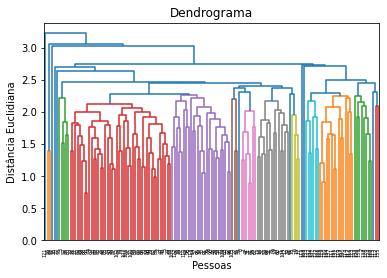

In [36]:
# método: average n_cluster = 5
dendrograma = dendrogram(linkage(np_dataset, method = 'average'))
plt.title('Dendrograma')
plt.xlabel('Pessoas')
plt.ylabel('Distância Euclidiana')

hc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
previsoes = hc.fit_predict(np_dataset)
previsoes


array([4, 4, 2, 5, 0, 2, 2, 1, 3, 5, 5, 1, 5, 5, 4, 2, 5, 2, 2, 0, 0, 0,
       0, 4, 2, 0, 3, 0, 0, 2, 4, 4, 5, 5, 0, 0, 0, 4, 2, 5, 2, 4, 2, 0,
       0, 0, 0, 0, 3, 2, 0, 4, 5, 5, 2, 0, 2, 4, 0, 3, 5, 2, 2, 0, 2, 0,
       0, 4, 4, 0, 3, 5, 3, 2, 2, 3, 3, 0, 4, 2, 5, 4, 0, 2, 0, 2, 2, 3,
       3, 2, 3, 4, 2, 2, 0, 3, 3, 2, 3, 2, 2, 2, 2, 2, 5, 4, 3, 1, 1, 3,
       6, 6, 6, 6, 1, 1, 6, 1, 3, 1, 1, 1, 3, 6, 1, 1, 1, 6, 6, 1, 1, 6,
       6, 6, 6, 6, 1, 6, 1, 1, 1, 6, 6, 1, 6], dtype=int64)

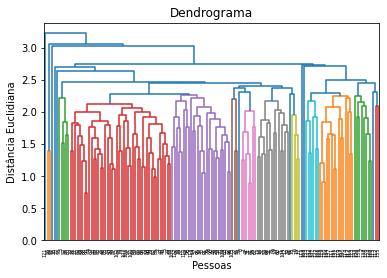

In [37]:
# método: average n_cluster = 7
dendrograma = dendrogram(linkage(np_dataset, method = 'average'))
plt.title('Dendrograma')
plt.xlabel('Pessoas')
plt.ylabel('Distância Euclidiana')

hc = AgglomerativeClustering(n_clusters = 7, affinity = 'euclidean', linkage = 'ward')
previsoes = hc.fit_predict(np_dataset)
previsoes

# Análise

O armazenamento em cluster hierárquico não pode manipular dados grandes, mas o armazenamento em cluster K Means pode, devido a isso, por estarmos manipulando uma base relativamente pequena, não houve problemas para usar o hierárquico. No entanto, ao considerar aumentar a quantidade de amostras, deve se considerar usar apenas o K-Means. 
O método escolhido é o K-Means, visto a sua ampla utilização por parte dos usuários, o método aplica ótimos resultados quando o numero de clusters já é definido.



FASE BÔNUS: Diga vantagens e desvantagens do uso do AUTOML e como você faria para usá-lo, garantindo os melhores resultados possíveis.

Vantagens de utilizar AutoML:
•	São requeridos apenas conhecimento superficial de machine learning (aprendizado de máquina), que já é suficiente para se utilizar as ferramentas, automatizando passos e diminuindo o tempo para se ter resultados iniciais. 
•	É possível aplicar em diferentes tipos de dados e problemas, podendo ser usado como baseline para pesquisas, com a possibilidade de incluir técnicas famosas.
•	Algumas ferramentas possibilitam customizar modelos/layers.
Já as desvantagens são:
•	Pode oferecer uma customização que pode ser limitada ou dificultada, ou pode não obter resultado bom o bastante para o problema, precisando da intervenção de especialistas. 
•	Não evitará a necessidade de esforço para se obter e preparar dados adequados para aprendizado de máquina, ou seja, será necessário que os dados tenham passado por um processo de tratamento (engenharia de dados).
Na minha opinião, o uso do AUTOML contribui muito para a disseminação e aplicabilidade de técnicas de machine learning. A melhor forma para utilizar é aplicando em problemas que requerem o uso de estatística sofisticada, contribuindo para obter resultados cada vez mais precisos. 
